In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
train_data = pd.read_csv("train_data.csv")

In [4]:
train_label = pd.read_csv("train_label.csv")

In [5]:
test_data = pd.read_csv("test_data.csv")

In [6]:
test_data.head()

,date,ts,wp,hi,lo,open
0,2016-07-16,1.468627e+09,667.010196,669.99,662.01,667.48
1,2016-09-20,1.474330e+09,608.817753,609.92,605.60,608.60
2,2017-02-27,1.488154e+09,1189.531393,1198.99,1176.00,1184.91
3,2016-10-08,1.475885e+09,618.950957,620.00,617.55,618.11
4,2015-12-08,1.449533e+09,395.036331,418.94,386.69,394.73


In [7]:
train_data.head()

,date,ts,wp,hi,lo,open
0,2017-02-25,1.487981e+09,1172.382511,1189.49,1110.00,1186.91
1,2017-12-28,1.514419e+09,14292.860031,15489.00,13500.00,15360.01
2,2016-08-05,1.470355e+09,579.201128,592.87,570.39,587.50
3,2015-11-21,1.448064e+09,324.774137,328.00,316.33,322.39
4,2015-11-26,1.448496e+09,342.988280,368.18,328.98,328.99


In [8]:
train_label.head()

,date,close
0,2017-02-25,1158.00
1,2017-12-28,14450.01
2,2016-08-05,583.00
3,2015-11-21,327.00
4,2015-11-26,352.57


In [9]:
train_data = train_data.assign(label=train_label["close"])

In [10]:
train_data.head()

,date,ts,wp,hi,lo,open,label
0,2017-02-25,1.487981e+09,1172.382511,1189.49,1110.00,1186.91,1158.00
1,2017-12-28,1.514419e+09,14292.860031,15489.00,13500.00,15360.01,14450.01
2,2016-08-05,1.470355e+09,579.201128,592.87,570.39,587.50,583.00
3,2015-11-21,1.448064e+09,324.774137,328.00,316.33,322.39,327.00
4,2015-11-26,1.448496e+09,342.988280,368.18,328.98,328.99,352.57


In [11]:
train_data_vi = train_data.sort_values(by='date')

In [12]:
train_data_vi

,date,ts,wp,hi,lo,open,label
696,2015-04-15,1.429056e+09,222.270771,224.52,218.09,221.05,224.35
185,2015-04-16,1.429142e+09,227.779413,230.75,223.66,224.35,229.45
287,2015-04-18,1.429315e+09,223.398170,224.04,222.18,223.55,224.02
647,2015-04-19,1.429402e+09,224.667792,226.72,223.44,224.02,224.03
280,2015-04-21,1.429574e+09,227.170562,235.89,224.01,225.35,235.89
...,...,...,...,...,...,...,...
739,2017-12-31,1.514678e+09,13386.497711,14280.26,12633.80,12839.98,13863.13
571,2018-01-01,1.514765e+09,13425.054178,13889.00,12952.50,13863.14,13480.01
450,2018-01-03,1.514938e+09,14989.939350,15400.00,14628.00,14781.52,15098.14
367,2018-01-04,1.515024e+09,14851.477880,15400.00,14230.00,15098.23,15144.99


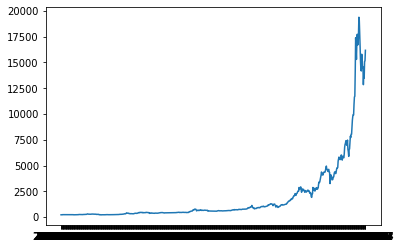

In [13]:
plt.plot(train_data_vi["date"],train_data_vi["label"])

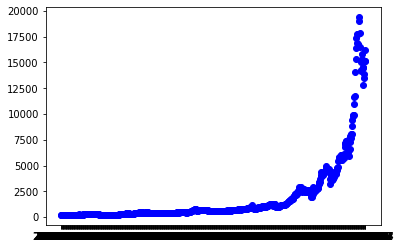

In [14]:
plt.scatter(train_data_vi["date"],train_data_vi["label"], c ="blue")

In [15]:
train_data.corr()

,ts,wp,hi,lo,open,label
ts,1.000000,0.653069,0.647842,0.659117,0.651009,0.652228
wp,0.653069,1.000000,0.998900,0.998947,0.998828,0.999336
hi,0.647842,0.998900,1.000000,0.996535,0.997239,0.999247
lo,0.659117,0.998947,0.996535,1.000000,0.997598,0.998290
open,0.651009,0.998828,0.997239,0.997598,1.000000,0.997208
label,0.652228,0.999336,0.999247,0.998290,0.997208,1.000000


In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    749 non-null    object 
 1   ts      749 non-null    float64
 2   wp      749 non-null    float64
 3   hi      749 non-null    float64
 4   lo      749 non-null    float64
 5   open    749 non-null    float64
 6   label   749 non-null    float64
dtypes: float64(6), object(1)
memory usage: 41.1+ KB


# Data cleaning 

In [17]:
train_data.isnull().sum().sum()

0

In [18]:
train_data.head()

,date,ts,wp,hi,lo,open,label
0,2017-02-25,1.487981e+09,1172.382511,1189.49,1110.00,1186.91,1158.00
1,2017-12-28,1.514419e+09,14292.860031,15489.00,13500.00,15360.01,14450.01
2,2016-08-05,1.470355e+09,579.201128,592.87,570.39,587.50,583.00
3,2015-11-21,1.448064e+09,324.774137,328.00,316.33,322.39,327.00
4,2015-11-26,1.448496e+09,342.988280,368.18,328.98,328.99,352.57


# feature selection

In [19]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt 
model=ExtraTreesRegressor()

In [20]:
train_data1=train_data.drop(['date'],axis=1)

In [21]:
X=train_data1.loc[:,train_data1.columns != 'label']
model.fit(X,train_data1['label'])

ExtraTreesRegressor()

In [22]:
print(model.feature_importances_)
# ts , wp , hi, lo , open 

[0.04118139 0.22234076 0.30483973 0.22106421 0.21057391]


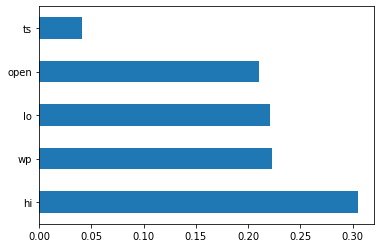

In [23]:
feat_importances=pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [24]:
# importance of timestamp feature is less so we will ignore timestamp feature

# Split the Data

In [25]:
#Assign the X and y variables
features = ["wp", "hi", "lo","open"]
X = train_data[features]
y = train_data['label']

In [26]:
# Split into validation and training data
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Random forest

In [27]:
# Identify Model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=1)
from sklearn.metrics import mean_absolute_error

In [28]:
# Fit Model
rf_model.fit(train_X, train_y)

RandomForestRegressor(random_state=1)

In [29]:
rf_pred_train = rf_model.predict(train_X)

In [30]:
rf_random_mae_train = mean_absolute_error(train_y,rf_pred_train)
rf_random_mae_train

18.20154313725487

In [31]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [32]:
# Make validation predictions 
rf_pred = rf_model.predict(val_X)

In [33]:
#Calculate mean absolute error

rf_val_mae = mean_absolute_error(val_y,rf_pred)
rf_val_mae

34.7452441489363

In [34]:
from pprint import pprint

In [41]:
from sklearn.model_selection import GridSearchCV

In [60]:
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 150, num = 10)]

max_features = ['auto', 'sqrt', 'log2']

max_depth = [int(x) for x in np.linspace(10, 20, num = 11)]
max_depth.append(None)


random_grid = {'bootstrap': [True, False],
             
              'criterion': ['mse'],
              'max_depth': max_depth,
              'max_features': max_features,
              'min_impurity_decrease': [0.0],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'min_weight_fraction_leaf': [0.0],
              'n_estimators': n_estimators,
              'random_state': [0,1,42],
              'verbose': [0],
              'warm_start': [False,True]}

pprint(random_grid)

{'bootstrap': [True, False],
 'criterion': ['mse'],
 'max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, None],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_impurity_decrease': [0.0],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'min_weight_fraction_leaf': [0.0],
 'n_estimators': [50, 61, 72, 83, 94, 105, 116, 127, 138, 150],
 'random_state': [0, 1, 42],
 'verbose': [0],
 'warm_start': [False, True]}


In [61]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)


rf_random.fit(train_X, train_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['mse'],
                                        'max_depth': [10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20,
                                                      None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_impurity_decrease': [0.0],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'min_weight_fraction_leaf': [0.0],
                                        'n_estimators': [50, 61, 72, 83, 94,
                                                

In [62]:
rf_random_pred_train = rf_random.predict(train_X)
rf_random_mae_train = mean_absolute_error(train_y,rf_random_pred_train)
rf_random_mae_train

0.21798716692352535

In [63]:
rf_random.best_params_

{'bootstrap': False,
 'criterion': 'mse',
 'max_depth': 12,
 'max_features': 'sqrt',
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 94,
 'random_state': 1,
 'verbose': 0,
 'warm_start': True}

In [64]:
# Make validation predictions 
rf_random_pred = rf_random.predict(val_X)
rf_random_mae = mean_absolute_error(val_y,rf_random_pred)
rf_random_mae

38.76984392126611

# BayesianRidge

In [65]:
from sklearn import linear_model

In [131]:
BayesianRidge_reg = linear_model.BayesianRidge()
BayesianRidge_reg.fit(train_X, train_y)

BayesianRidge()

In [132]:
# Make validation predictions 
BayesianRidge_pred = BayesianRidge_reg.predict(val_X)

In [133]:
BayesianRidge_val_mae = mean_absolute_error(val_y,BayesianRidge_pred)
BayesianRidge_val_mae

20.014977533949814

In [69]:
reg_hyper = linear_model.BayesianRidge()

In [70]:
bay_params = {'alpha_init':[1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.9],
              'lambda_init': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-9]}
a = GridSearchCV(estimator=reg_hyper, param_grid = bay_params, cv = 3, n_jobs=-1)
a.fit(train_X, train_y)

GridSearchCV(cv=3, estimator=BayesianRidge(), n_jobs=-1,
             param_grid={'alpha_init': [1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.9],
                         'lambda_init': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                         1e-09]})

In [71]:
# Make validation predictions 
BayesianRidge_hyper_pred = a.predict(val_X)

In [72]:
BayesianRidge_hyper_val_mae = mean_absolute_error(val_y,BayesianRidge_hyper_pred)
BayesianRidge_hyper_val_mae

20.014977537157478

# SVM

In [73]:
from sklearn import svm

In [74]:
SVM_regr = svm.SVR()

In [75]:
SVM_regr.fit(train_X, train_y)

SVR()

In [76]:
SVM_regr.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [77]:
# Make validation predictions 
SVM_pred = SVM_regr.predict(val_X)

In [78]:
SVM_val_mae = mean_absolute_error(val_y,SVM_pred)
SVM_val_mae

1237.032388375347

In [79]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000,100000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVM_regr, param_grid, refit = True, verbose = 0)
 
# fitting the model for grid search
grid.fit(train_X, train_y)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 100000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [80]:
grid.best_params_

{'C': 100000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [81]:
# Make validation predictions 
SVM_hyper_pred = grid.predict(val_X)
SVM_val_hyper_mae = mean_absolute_error(val_y,SVM_hyper_pred)
SVM_val_hyper_mae

507.5048423706802

#LSTM

In [82]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import activations
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras import optimizers
from sklearn import preprocessing
from joblib import dump, load
from sklearn.metrics import mean_absolute_error
np.random.seed(7)

In [83]:
from tensorflow.keras.optimizers import Adam

In [84]:
from sklearn.preprocessing import MinMaxScaler

In [85]:
SEQ_LEN = 100

In [86]:
print("train_X: ", train_X.shape)
print("train_y: ", train_y.shape)
print("val_X: ", val_X.shape)
print("val_y", val_y.shape)

train_X:  (561, 4)
train_y:  (561,)
val_X:  (188, 4)
val_y (188,)


In [87]:
#SPLIT DATA INTO TEST AND TRAIN
np.random.seed(7)

#Assign the X and y variables
features = ["wp", "hi", "lo","open"]
X = train_data[features]
Y = train_data[['label']]


#NORMALIZATION
f_transformer = preprocessing.MinMaxScaler((-1,1))
f_transformer = f_transformer.fit(X)


cnt_transformer = preprocessing.MinMaxScaler((-1,1))
cnt_transformer = cnt_transformer.fit(Y)


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle = False)

X_train_trans = f_transformer.transform(X_train)
X_test_trans = f_transformer.transform(X_test)

y_train_trans = cnt_transformer.transform(y_train)
y_test_trans = cnt_transformer.transform(y_test)


In [88]:
#CREATE LAGGING DATASET FOR TIMESERIES
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 5
# reshape to [samples, time_steps, n_features]
X_train_f, y_train_f = create_dataset(X_train_trans, y_train_trans, time_steps)
X_test_f, y_test_f = create_dataset(X_test_trans, y_test_trans, time_steps)

print("*** SHAPES")
print(X_train_f.shape, y_train_f.shape)
print(X_test_f.shape, y_test_f.shape)

*** SHAPES
(594, 5, 4) (594, 1)
(145, 5, 4) (145, 1)


In [89]:
print("*** SHAPES")
print(X_train_trans.shape, y_train_trans.shape)
print(X_test_trans.shape, y_test_trans.shape)

*** SHAPES
(599, 4) (599, 1)
(150, 4) (150, 1)


In [90]:
model = keras.Sequential()
#model.add(keras.Input(shape=((X_train_f.shape[1], X_train_f.shape[2]))))
model.add(layers.LSTM(50, return_sequences=True,
               input_shape=(X_train_f.shape[1], X_train_f.shape[2])))

model.add(layers.LSTM(50, return_sequences=False, activation = 'tanh'))
model.add(layers.BatchNormalization())

model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 50)             11000     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 batch_normalization (BatchN  (None, 50)               200       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 31,451
Trainable params: 31,351
Non-trainable params: 100
_________________________________________________________________


In [91]:
hist = model.fit(X_train_f, y_train_f, batch_size = 200, epochs = 50, shuffle=False, validation_split=0.1,verbose=0)

In [92]:
import math

y_pred = model.predict(X_test_f) 

y_test_inv = cnt_transformer.inverse_transform(y_test_f)
y_pred_inv = cnt_transformer.inverse_transform(y_pred)
combined_array = np.concatenate((y_test_inv,y_pred_inv),axis=1)
combined_array2 = np.concatenate((X_test.iloc[time_steps:],combined_array),axis=1)

df_final = pd.DataFrame(data = combined_array, columns=["actual", "predicted"])

print("size: %d" % (len(combined_array)))
df_final.head(4)

size: 145


,actual,predicted
0,378.46,1797.669678
1,211.16,1838.025879
2,1062.15,1854.782837
3,4339.00,1892.952393


In [93]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

results = model.evaluate(X_test_f, y_test_f)
LSTM_val_mae = mean_absolute_error(y_pred_inv, y_test_inv)

print("mae: %s" % (LSTM_val_mae))
print(results)

5/5 [==============================] - 0s 4ms/step - loss: 0.0992
mae: 1922.804580616918
0.09920955449342728


# LinearRegression

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
LinearRegression_model = LinearRegression().fit(train_X, train_y)

In [97]:
# Make validation predictions 
LinearRegression_pred = LinearRegression_model.predict(val_X)

In [98]:
LinearRegression_val_mae = mean_absolute_error(val_y,LinearRegression_pred)
LinearRegression_val_mae

20.015528249334626

# Decision Tree Regressor

In [99]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
DecisionTree_regressor = DecisionTreeRegressor(random_state = 0)

In [100]:
DecisionTree_regressor.fit(train_X, train_y)

DecisionTreeRegressor(random_state=0)

In [101]:
# Make validation predictions 
DecisionTree_pred = DecisionTree_regressor.predict(val_X)

In [102]:
LinearRegression_val_mae = mean_absolute_error(val_y,DecisionTree_pred)
LinearRegression_val_mae

51.92957446808511

In [103]:
DecisionTree_regressor.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [104]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12,None],
           "min_samples_leaf":[1,2,3,4,5,],
           "min_weight_fraction_leaf":[0.0,0.1,0.2,0.3],
           "max_features":["auto","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50] }

In [105]:
tuning_model=GridSearchCV(DecisionTree_regressor,param_grid=parameters,cv=3,verbose=0)
tuning_model.fit(train_X, train_y)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12, None],
                         'max_features': ['auto', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3],
                         'splitter': ['best', 'random']})

In [106]:
# Make validation predictions 
DecisionTree_hyper_pred = tuning_model.predict(val_X)
LinearRegression_hyper_val_mae = mean_absolute_error(val_y,DecisionTree_hyper_pred)
LinearRegression_hyper_val_mae

57.767633090746074

# Lasso Regression

In [107]:
from sklearn.linear_model import Lasso

In [108]:
Lasso_model = Lasso(alpha=1.0)

In [109]:
Lasso_model.fit(train_X, train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.187e+06, tolerance: 6.372e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso()

In [110]:
# Make validation predictions 
Lasso_pred = Lasso_model.predict(val_X)

In [111]:
Lasso_mae = mean_absolute_error(val_y,Lasso_pred)
Lasso_mae

21.988039726060883

In [112]:
Lasso_model.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [113]:
from scipy.stats import uniform 

In [114]:
Lasso_model = Lasso()

In [121]:
param_grid = {'alpha': uniform()}

In [ ]:
rand_search = RandomizedSearchCV(estimator=Lasso_model, 
                                 param_distributions=param_grid,
                                 n_iter=100)

rand_search.fit(train_X, train_y
                )

In [123]:
# Make validation predictions 
Lasso_hyper_pred = rand_search.predict(val_X)
Lasso_hyper_mae = mean_absolute_error(val_y,Lasso_hyper_pred)
Lasso_hyper_mae

21.988046283829988

# KNeighborsRegressor

In [124]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(train_X)
x_train_knn = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(val_X)
x_test_knn = pd.DataFrame(x_test_scaled)

In [125]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train_knn, train_y)  #fit the model
    pred_knn=model.predict(x_test_knn) #make prediction on test set
    error = sqrt(mean_squared_error(val_y,pred_knn)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('mse value for k= ' , K , 'is:', error)

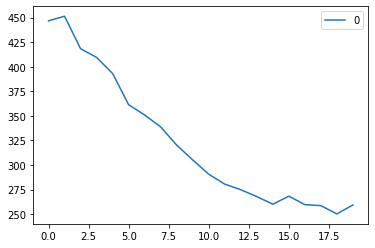

In [127]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

# For BayesianRidge mse score is the best. so i will use BayesianRidge for making prediction.

In [135]:
test_data.head(10)

,date,ts,wp,hi,lo,open
0,2016-07-16,1.468627e+09,667.010196,669.99,662.01,667.48
1,2016-09-20,1.474330e+09,608.817753,609.92,605.60,608.60
2,2017-02-27,1.488154e+09,1189.531393,1198.99,1176.00,1184.91
3,2016-10-08,1.475885e+09,618.950957,620.00,617.55,618.11
4,2015-12-08,1.449533e+09,395.036331,418.94,386.69,394.73


In [138]:
test_feature = test_data[["wp", "hi", "lo","open"]]

In [142]:
test_label=BayesianRidge_reg.predict(test_feature)

In [ ]:
test_label

In [144]:
test_label_df=pd.DataFrame(test_label,columns=["test_label"])

In [145]:
test_label_df

,test_label
0,665.348145
1,606.955852
2,1189.289634
3,617.914538
4,404.665617
...,...
245,1123.119584
246,903.579602
247,574.269152
248,315.871205


In [147]:
test_data["test_label"]=test_label

In [149]:
test_data

,date,ts,wp,hi,lo,open,test_label
0,2016-07-16,1.468627e+09,667.010196,669.99,662.01,667.48,665.348145
1,2016-09-20,1.474330e+09,608.817753,609.92,605.60,608.60,606.955852
2,2017-02-27,1.488154e+09,1189.531393,1198.99,1176.00,1184.91,1189.289634
3,2016-10-08,1.475885e+09,618.950957,620.00,617.55,618.11,617.914538
4,2015-12-08,1.449533e+09,395.036331,418.94,386.69,394.73,404.665617
...,...,...,...,...,...,...,...
245,2017-02-22,1.487722e+09,1124.780081,1140.00,1104.90,1129.67,1123.119584
246,2017-01-24,1.485216e+09,908.492474,923.00,880.00,911.78,903.579602
247,2016-08-18,1.471478e+09,575.128134,576.99,573.00,574.45,574.269152
248,2015-11-11,1.447200e+09,316.034258,341.75,293.32,337.14,315.871205


In [146]:
test_label_df.to_csv('manoj_kumar_19188_test_label.txt', header=None,index=None, sep=' ', mode='a')